<a href="https://colab.research.google.com/github/ahsoliveira/data_science_projects/blob/master/Analisando_a_Viol%C3%AAncia_no_Rio_de_Janeiro_AlexandreHSO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img alt="Colaboratory logo" width="15%" src="https://raw.githubusercontent.com/carlosfab/escola-data-science/master/img/novo_logo_bg_claro.png">

#### **Data Science na Prática 2.0**
*by [sigmoidal.ai](https://sigmoidal.ai)* e Alexandre H S de Oliveira


# Analisando a Violência no Rio de Janeiro
O Rio de Janeiro é uma das cidades que mais recebem turistas no Brasil, com essa atividade representando cada vez uma importante parcela do PIB da cidade como do estado. Além disso é a segunda cidade mais populosa do país, ficando atrás apenas de São Paulo, segundo o Censo de 2010 a Cidade do Rio de Janeiro tem **6,32 milhões de habitante** . Contudo, índices de violência elevados podem acabar influenciando negativamente esse ramo de atividade e prejudicando a população local.

Dessa forma a presente análise tem como finalidade averiguar as características da violência, para que se possa ter como base a situação atual da cidade do Rio de Janeiro.

## Obtenção dos Dados


Os dados utilizandos estão disponíveis na plataforma **Dados Abertos** do estado do Rio de Janeiro

### Importando os dados

Importe os dados os dados disponibilizados.

In [2]:
#importando bibliotecas
import pandas as pd

# Importando dados
df = pd.read_csv("https://raw.githubusercontent.com/carlosfab/dsnp2/master/datasets/violencia_rio.csv")

#Visualizando o DataFrame 
df

,vano,mes,hom_doloso,lesao_corp_morte,latrocinio,hom_por_interv_policial,tentat_hom,lesao_corp_dolosa,estupro,hom_culposo,lesao_corp_culposa,roubo_comercio,roubo_residencia,roubo_veiculo,roubo_carga,roubo_transeunte,roubo_em_coletivo,roubo_banco,roubo_cx_eletronico,roubo_celular,roubo_conducao_saque,roubo_apos_saque,roubo_bicicleta,outros_roubos,total_roubos,furto_veiculos,furto_transeunte,furto_coletivo,furto_celular,furto_bicicleta,outros_furtos,total_furtos,sequestro,extorsao,sequestro_relampago,estelionato,apreensao_drogas,posse_drogas,trafico_drogas,apreensao_drogas_sem_autor,recuperacao_veiculos,apf,aaapai,cmp,cmba,ameaca,pessoas_desaparecidas,encontro_cadaver,encontro_ossada,pol_militares_mortos_serv,pol_civis_mortos_serv,indicador_letalidade,indicador_roubo_rua,indicador_roubo_veic,registro_ocorrencias,fase
0,1991,1,657,NaN,15,NaN,162,3051,NaN,NaN,NaN,350,188,1174,63,967,381,37,NaN,NaN,NaN,NaN,NaN,158,3318,2009,1147,NaN,NaN,NaN,3561,6717,NaN,NaN,NaN,NaN,133,NaN,NaN,NaN,872,NaN,NaN,NaN,NaN,NaN,NaN,217,NaN,NaN,NaN,672,1348,1174,NaN,3
1,1991,2,732,NaN,17,NaN,175,3421,NaN,NaN,NaN,357,171,1097,64,963,432,35,NaN,NaN,NaN,NaN,NaN,142,3261,1850,1066,NaN,NaN,NaN,3309,6225,NaN,NaN,NaN,NaN,127,NaN,NaN,NaN,751,NaN,NaN,NaN,NaN,NaN,NaN,209,NaN,NaN,NaN,749,1395,1097,NaN,3
2,1991,3,713,NaN,25,NaN,216,3613,NaN,NaN,NaN,443,191,1265,71,963,422,43,NaN,NaN,NaN,NaN,NaN,131,3529,2084,1062,NaN,NaN,NaN,3573,6719,NaN,NaN,NaN,NaN,80,NaN,NaN,NaN,789,NaN,NaN,NaN,NaN,NaN,NaN,188,NaN,NaN,NaN,738,1385,1265,NaN,3
3,1991,4,634,NaN,20,NaN,200,3211,NaN,NaN,NaN,425,199,1415,81,1186,354,36,NaN,NaN,NaN,NaN,NaN,112,3808,2085,1195,NaN,NaN,NaN,3290,6570,NaN,NaN,NaN,NaN,133,NaN,NaN,NaN,787,NaN,NaN,NaN,NaN,NaN,NaN,140,NaN,NaN,NaN,654,1540,1415,NaN,3
4,1991,5,650,NaN,20,NaN,146,3051,NaN,NaN,NaN,553,231,1449,82,931,335,27,NaN,NaN,NaN,NaN,NaN,147,3755,2185,723,NaN,NaN,NaN,3546,6454,NaN,NaN,NaN,NaN,163,NaN,NaN,NaN,845,NaN,NaN,NaN,NaN,NaN,NaN,78,NaN,NaN,NaN,670,1266,1449,NaN,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
339,2019,4,360,1.0,11,124.0,466,5573,483.0,172.0,2182.0,502,124,3755,667,7031,1585,2,4.0,2424.0,10.0,82.0,23.0,2245,18454,1244,1519,607.0,1318.0,211.0,7633,12532,0.0,151.0,11.0,3260.0,1909,745.0,1021.0,187.0,2624,3128.0,497.0,1648.0,350.0,5310.0,408.0,22,3.0,1.0,0.0,496,11040,3755,67797.0,3
340,2019,5,345,2.0,15,172.0,478,4958,465.0,145.0,2304.0,514,93,3649,710,7332,1625,1,3.0,2427.0,9.0,87.0,7.0,2216,18673,1480,1475,715.0,1423.0,220.0,7711,13024,0.0,147.0,7.0,3498.0,2034,735.0,1133.0,199.0,2450,3169.0,527.0,1771.0,248.0,5068.0,390.0,20,1.0,0.0,0.0,534,11384,3649,68336.0,3
341,2019,6,332,3.0,8,153.0,436,4769,414.0,152.0,2481.0,382,85,3115,599,6077,1287,1,4.0,2187.0,19.0,83.0,9.0,1984,15832,1251,1443,630.0,1345.0,189.0,7224,12082,0.0,133.0,6.0,3029.0,1854,763.0,976.0,158.0,2041,2848.0,467.0,1585.0,233.0,4497.0,403.0,20,1.0,3.0,0.0,496,9551,3115,61202.0,3
342,2019,7,309,5.0,10,194.0,399,4740,402.0,140.0,2334.0,386,72,3198,691,6637,1208,1,0.0,2226.0,12.0,97.0,16.0,2110,16654,1353,1570,746.0,1391.0,230.0,7632,12922,0.0,135.0,12.0,3627.0,1861,709.0,996.0,187.0,2355,2907.0,490.0,1856.0,267.0,4678.0,400.0,32,7.0,0.0,0.0,518,10071,3198,65817.0,2


## Análise Inicial dos Dados

A partir do *DataFrame* podemos verificar características interessantes, como o tamanho da nossa base de dados:
* 344 Linhas por 56 Colunas
  * as colunas podem ser modeladas como nossas variáveis de análise, como: Tipos de crimes, meses e anos.

Como será analisado a seguir:


In [3]:
#Tamanho do DataFrame
df.shape[0]

344

In [4]:
# Colunas
df.columns

Index(['vano', 'mes', 'hom_doloso', 'lesao_corp_morte', 'latrocinio',
       'hom_por_interv_policial', 'tentat_hom', 'lesao_corp_dolosa', 'estupro',
       'hom_culposo', 'lesao_corp_culposa', 'roubo_comercio',
       'roubo_residencia', 'roubo_veiculo', 'roubo_carga', 'roubo_transeunte',
       'roubo_em_coletivo', 'roubo_banco', 'roubo_cx_eletronico',
       'roubo_celular', 'roubo_conducao_saque', 'roubo_apos_saque',
       'roubo_bicicleta', 'outros_roubos', 'total_roubos', 'furto_veiculos',
       'furto_transeunte', 'furto_coletivo', 'furto_celular',
       'furto_bicicleta', 'outros_furtos', 'total_furtos', 'sequestro',
       'extorsao', 'sequestro_relampago', 'estelionato', 'apreensao_drogas',
       'posse_drogas', 'trafico_drogas', 'apreensao_drogas_sem_autor',
       'recuperacao_veiculos', 'apf', 'aaapai', 'cmp', 'cmba', 'ameaca',
       'pessoas_desaparecidas', 'encontro_cadaver', 'encontro_ossada',
       'pol_militares_mortos_serv', 'pol_civis_mortos_serv',
       'ind

As colunas são do *DataFrame* são majoritariamente compostas pelos principais tipos de crime presente no estado.

### Tipos de variáveis

é Importante verificar que tipo de variável é utilizada em cada coluna, para caso seja necessário possa-se fazer as correções necessárias para a manipulação e tratamento dessas.


In [5]:
# Tipos de variáveis
df.dtypes

vano                            int64
mes                             int64
hom_doloso                      int64
lesao_corp_morte              float64
latrocinio                      int64
hom_por_interv_policial       float64
tentat_hom                      int64
lesao_corp_dolosa               int64
estupro                       float64
hom_culposo                   float64
lesao_corp_culposa            float64
roubo_comercio                  int64
roubo_residencia                int64
roubo_veiculo                   int64
roubo_carga                     int64
roubo_transeunte                int64
roubo_em_coletivo               int64
roubo_banco                     int64
roubo_cx_eletronico           float64
roubo_celular                 float64
roubo_conducao_saque          float64
roubo_apos_saque              float64
roubo_bicicleta               float64
outros_roubos                   int64
total_roubos                    int64
furto_veiculos                  int64
furto_transe

### Cabeçalho dos dados

Apenas para verificar a disposição do dados no DataFrame

In [6]:
 # cabeçalho primeiros dados
 df.head()

,vano,mes,hom_doloso,lesao_corp_morte,latrocinio,hom_por_interv_policial,tentat_hom,lesao_corp_dolosa,estupro,hom_culposo,lesao_corp_culposa,roubo_comercio,roubo_residencia,roubo_veiculo,roubo_carga,roubo_transeunte,roubo_em_coletivo,roubo_banco,roubo_cx_eletronico,roubo_celular,roubo_conducao_saque,roubo_apos_saque,roubo_bicicleta,outros_roubos,total_roubos,furto_veiculos,furto_transeunte,furto_coletivo,furto_celular,furto_bicicleta,outros_furtos,total_furtos,sequestro,extorsao,sequestro_relampago,estelionato,apreensao_drogas,posse_drogas,trafico_drogas,apreensao_drogas_sem_autor,recuperacao_veiculos,apf,aaapai,cmp,cmba,ameaca,pessoas_desaparecidas,encontro_cadaver,encontro_ossada,pol_militares_mortos_serv,pol_civis_mortos_serv,indicador_letalidade,indicador_roubo_rua,indicador_roubo_veic,registro_ocorrencias,fase
0,1991,1,657,NaN,15,NaN,162,3051,NaN,NaN,NaN,350,188,1174,63,967,381,37,NaN,NaN,NaN,NaN,NaN,158,3318,2009,1147,NaN,NaN,NaN,3561,6717,NaN,NaN,NaN,NaN,133,NaN,NaN,NaN,872,NaN,NaN,NaN,NaN,NaN,NaN,217,NaN,NaN,NaN,672,1348,1174,NaN,3
1,1991,2,732,NaN,17,NaN,175,3421,NaN,NaN,NaN,357,171,1097,64,963,432,35,NaN,NaN,NaN,NaN,NaN,142,3261,1850,1066,NaN,NaN,NaN,3309,6225,NaN,NaN,NaN,NaN,127,NaN,NaN,NaN,751,NaN,NaN,NaN,NaN,NaN,NaN,209,NaN,NaN,NaN,749,1395,1097,NaN,3
2,1991,3,713,NaN,25,NaN,216,3613,NaN,NaN,NaN,443,191,1265,71,963,422,43,NaN,NaN,NaN,NaN,NaN,131,3529,2084,1062,NaN,NaN,NaN,3573,6719,NaN,NaN,NaN,NaN,80,NaN,NaN,NaN,789,NaN,NaN,NaN,NaN,NaN,NaN,188,NaN,NaN,NaN,738,1385,1265,NaN,3
3,1991,4,634,NaN,20,NaN,200,3211,NaN,NaN,NaN,425,199,1415,81,1186,354,36,NaN,NaN,NaN,NaN,NaN,112,3808,2085,1195,NaN,NaN,NaN,3290,6570,NaN,NaN,NaN,NaN,133,NaN,NaN,NaN,787,NaN,NaN,NaN,NaN,NaN,NaN,140,NaN,NaN,NaN,654,1540,1415,NaN,3
4,1991,5,650,NaN,20,NaN,146,3051,NaN,NaN,NaN,553,231,1449,82,931,335,27,NaN,NaN,NaN,NaN,NaN,147,3755,2185,723,NaN,NaN,NaN,3546,6454,NaN,NaN,NaN,NaN,163,NaN,NaN,NaN,845,NaN,NaN,NaN,NaN,NaN,NaN,78,NaN,NaN,NaN,670,1266,1449,NaN,3


###Dados Ausentes

Veirificando os dados ausentes nas principais variáveis, anteas de realizar as análises necessárias


In [7]:
#dados ausentes
df.isnull().sum()

vano                            0
mes                             0
hom_doloso                      0
lesao_corp_morte               96
latrocinio                      0
hom_por_interv_policial        84
tentat_hom                      0
lesao_corp_dolosa               0
estupro                       144
hom_culposo                    84
lesao_corp_culposa             96
roubo_comercio                  0
roubo_residencia                0
roubo_veiculo                   0
roubo_carga                     0
roubo_transeunte                0
roubo_em_coletivo               0
roubo_banco                     0
roubo_cx_eletronico           144
roubo_celular                 108
roubo_conducao_saque          144
roubo_apos_saque              144
roubo_bicicleta               276
outros_roubos                   0
total_roubos                    0
furto_veiculos                  0
furto_transeunte                0
furto_coletivo                144
furto_celular                 144
furto_biciclet

Com os dados brutos, pode-se analisar o percentual de dados ausentes em cada uma das colunas do *DataFrame*

In [9]:
# Porcentagem de dados ausentes
df.isnull().sum()/df.shape[0]

vano                          0.000000
mes                           0.000000
hom_doloso                    0.000000
lesao_corp_morte              0.279070
latrocinio                    0.000000
hom_por_interv_policial       0.244186
tentat_hom                    0.000000
lesao_corp_dolosa             0.000000
estupro                       0.418605
hom_culposo                   0.244186
lesao_corp_culposa            0.279070
roubo_comercio                0.000000
roubo_residencia              0.000000
roubo_veiculo                 0.000000
roubo_carga                   0.000000
roubo_transeunte              0.000000
roubo_em_coletivo             0.000000
roubo_banco                   0.000000
roubo_cx_eletronico           0.418605
roubo_celular                 0.313953
roubo_conducao_saque          0.418605
roubo_apos_saque              0.418605
roubo_bicicleta               0.802326
outros_roubos                 0.000000
total_roubos                  0.000000
furto_veiculos           

## Informações Estatísticas da Violência no Rio de Janeiro

Utilizando o método `describe()` podemos traçar um perfil mais detalhado das principais características presente no *DataFrame*, como:
* Contagem de itens não nulos em cada coluna (`count`);
* média de cada coluna (´mean´);
* Desvio padrão de cada Variável (`std`);
* Valor mínimo (`min`);
* Primeiro Quartil (`25%`);
* Segundo Quartil, mediana (`50%`);
* Terceiro Quartil (`75%`);
* Valor máximo (``)


Descreva e execute as seguintes etapas:

* Imprima o resumo estatístico do seu DataFrame (`describe`)
* Encontre as médias das seguintes variáveis (colunas):
  * `roubo_veiculo`
  * `furto_veiculos`
  * `recuperacao_veiculos`
* Calcule qual a porcentagem de carros recuperados em relação aos carros roubados + carros furtados:
  * $\frac{\text{recuperacao_veiculos}}{\text{roubo_veiculo} + \text{furto_veiculos}}$
* Encontre os valores máximos (`max`) e mínimos (`min`) da coluna `hom_doloso`


In [10]:
#resumo estatístico do DataFrame
df.describe()

,vano,mes,hom_doloso,lesao_corp_morte,latrocinio,hom_por_interv_policial,tentat_hom,lesao_corp_dolosa,estupro,hom_culposo,lesao_corp_culposa,roubo_comercio,roubo_residencia,roubo_veiculo,roubo_carga,roubo_transeunte,roubo_em_coletivo,roubo_banco,roubo_cx_eletronico,roubo_celular,roubo_conducao_saque,roubo_apos_saque,roubo_bicicleta,outros_roubos,total_roubos,furto_veiculos,furto_transeunte,furto_coletivo,furto_celular,furto_bicicleta,outros_furtos,total_furtos,sequestro,extorsao,sequestro_relampago,estelionato,apreensao_drogas,posse_drogas,trafico_drogas,apreensao_drogas_sem_autor,recuperacao_veiculos,apf,aaapai,cmp,cmba,ameaca,pessoas_desaparecidas,encontro_cadaver,encontro_ossada,pol_militares_mortos_serv,pol_civis_mortos_serv,indicador_letalidade,indicador_roubo_rua,indicador_roubo_veic,registro_ocorrencias,fase
count,344.000000,344.000000,344.000000,248.000000,344.000000,260.00000,344.000000,344.000000,200.000000,260.000000,248.000000,344.000000,344.000000,344.000000,344.000000,344.000000,344.000000,344.000000,200.000000,236.000000,200.000000,200.000000,68.000000,344.000000,344.000000,344.000000,344.000000,200.000000,200.000000,68.000000,344.000000,344.000000,248.000000,200.000000,200.000000,200.000000,344.000000,164.000000,164.000000,164.000000,344.000000,164.000000,164.000000,164.000000,164.000000,248.000000,212.000000,344.000000,212.000000,200.000000,200.00000,344.000000,344.000000,344.000000,248.000000,344.000000
mean,2004.837209,6.453488,504.555233,4.334677,15.668605,71.90000,318.267442,5492.799419,369.945000,212.119231,3410.762097,455.005814,133.284884,2448.697674,340.322674,3418.520349,659.002907,9.375000,3.550000,957.974576,11.320000,145.665000,10.808824,1211.223837,9428.119186,1674.671512,1518.921512,650.230000,1449.175000,124.808824,5994.328488,10433.177326,0.665323,133.265000,7.755000,2231.860000,1071.930233,609.237805,759.146341,186.146341,1772.238372,2319.585366,568.628049,1255.512195,83.042683,5530.326613,435.132075,66.261628,3.301887,2.085000,0.34000,577.691860,4734.738372,2448.697674,53794.161290,2.994186
std,8.289036,3.447759,113.774481,2.755357,5.861427,36.48882,127.606645,1514.220579,94.392434,54.234700,776.156561,119.765076,44.317963,789.689559,223.855243,2459.017549,297.622342,10.564894,2.634808,624.309034,6.404113,55.392367,7.767628,800.576723,4578.013053,294.852020,971.853102,268.836273,368.638776,80.247427,1964.767779,3696.725756,0.959128,43.303821,5.089646,772.093064,643.381991,246.307700,312.871487,36.221243,656.761843,650.520866,248.040620,357.035450,62.951374,1100.752625,65.353516,34.464519,2.192922,1.761616,0.63752,104.973929,3204.054864,789.689559,11039.051992,0.076138
min,1991.000000,1.000000,272.000000,0.000000,2.000000,10.00000,122.000000,2350.000000,188.000000,111.000000,848.000000,243.000000,49.000000,1097.000000,59.000000,688.000000,281.000000,0.000000,0.000000,0.000000,1.000000,11.000000,0.000000,81.000000,3261.000000,1159.000000,322.000000,23.000000,484.000000,0.000000,2322.000000,4691.000000,0.000000,23.000000,0.000000,717.000000,80.000000,248.000000,262.000000,114.000000,729.000000,1173.000000,225.000000,628.000000,21.000000,1409.000000,236.000000,0.000000,0.000000,0.000000,0.00000,334.000000,1086.000000,1097.000000,30621.000000,2.000000
25%,1998.000000,3.000000,413.750000,2.000000,11.000000,41.75000,200.000000,4067.000000,282.000000,176.000000,3040.000000,365.750000,103.750000,1889.750000,208.250000,1053.000000,430.750000,2.000000,2.000000,549.750000,6.000000,106.000000,2.250000,811.750000,5107.750000,1430.500000,732.000000,501.000000,1297.000000,3.750000,3978.000000,6700.250000,0.000000,109.750000,4.750000,1654.500000,714.500000,360.500000,426.000000,160.000000,1276.750000,1681.000000,332.500000,950.500000,46.000000,4868.500000,390.000000,42.000000,2.000000,1.000000,0.00000,500.000000,1557.000000,1889.750000,45374.500000,3.000000
50%,2005.000000,6.000000,507.000000,4.000000,15.000000,70.00000,318.500000,5830.500000,384.000000,203.000000,3372.000000,433.500000,125.000000,2322.000000

In [11]:
#Média de veículos roubados, furtados e recuperados no estado
print('Média de veículos roubados por mês:', df.roubo_veiculo.mean())
print('Média de veículos furtados por mês:', df.furto_veiculos.mean())
print('Média de veículos recuperado por mês:',df.recuperacao_veiculos.mean() )

Média de veículos roubados por mês: 2448.6976744186045
Média de veículos furtados por mês: 1674.671511627907
Média de veículos recuperado por mês: 1772.2383720930231


In [19]:
# Picos de Roubo, furto e Recuperação de veículos
print( 'Maior nº registrado de roubos em um mês: ', df.roubo_veiculo.max(),'veículos')
print( 'Maior nº registrado de furtados em um mês: ', df.furto_veiculos.max(),'veículos')
print( 'Maior nº registrado de recuperações em um mês: ', df.recuperacao_veiculos.max(),'veículos')

Maior nº registrado de roubos em um mês:  5358 veículos
Maior nº registrado de furtados em um mês:  2630 veículos
Maior nº registrado de recuperações em um mês:  3695 veículos


In [20]:
# Menor numero de casos de roubo, furto e recuperação de veículos
print( 'Menor nº registrado de roubos em um mês: ', df.roubo_veiculo.min(),'veículos')
print( 'Maior nº registrado de furtados em um mês: ', df.furto_veiculos.min(),'veículos')
print( 'Maior nº registrado de recuperações em um mês: ', df.recuperacao_veiculos.min(),'veículos')


Menor nº registrado de roubos em um mês:  1097 veículos
Maior nº registrado de furtados em um mês:  1159 veículos
Maior nº registrado de recuperações em um mês:  729 veículos


In [12]:
# Porcentagem de Recuperação de carros roubados
prcr = (df.recuperacao_veiculos.mean()/(df.roubo_veiculo.mean()+df.furto_veiculos.mean()))*100
print("Procentagem de Recuperação de veículos: ", prcr)

Procentagem de Recuperação de veículos:  42.980346705075085


Com isso podemos observar que apenas cerca de **43%** do veículos roubos são recuperados. Esse fator influência negativamente nos preços de seguro de veículos para o consumidor, aumentando os cusstos a serem considerados pela população e mesmo para turistas que utilizem da locação de veículos como meio de locomoção.

## Visualização de Dados

Para uma visualização da frequência de ocorrência da quantidade de homicídios dolosos, podemos utilizar o fluxograma para esta variável apresentada no *DataFrame* utilizado:



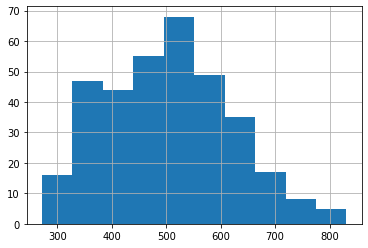

In [0]:
#histograma de Homicídios dolosos
df.hom_doloso.hist();

Como pode ser observado, há uma grande frequência de meses com uma taxa de homicídios entre 500 e 550 casos, por volta de 70 meses.
Dentro desse histórico também é interessante ressaltar:
* por volta de 5 meses houve cerca de 800 casos registrados;
* somente em 15 meses tivemos uma tava de homicídios com cerca de 300 casos registrados;


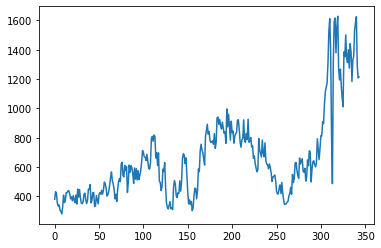

In [0]:
# Gráfico de Roubo em transporte coletivo
df.roubo_em_coletivo.plot();

No gráfico é possível observer ua certa tendência de crescimento para o número de casos de roubo em transporte coletivo

### Análise de Furtos e Roubos



In [0]:
#Análise roubos recorrentes
#criando um Data Freme apenas com os crímes da categoria roubo
df_roubo = df[['roubo_comercio', 'roubo_residencia', 'roubo_veiculo','roubo_carga', 'roubo_transeunte','roubo_em_coletivo', 'roubo_banco', 'roubo_cx_eletronico', 'roubo_celular', 'roubo_conducao_saque', 'roubo_apos_saque', 'roubo_bicicleta', 'outros_roubos' ]]


Roubos máximos registrados por categoria:  roubo_comercio           914.0
roubo_residencia         300.0
roubo_veiculo           5358.0
roubo_carga             1329.0
roubo_transeunte        9669.0
roubo_em_coletivo       1628.0
roubo_banco               54.0
roubo_cx_eletronico       12.0
roubo_celular           2626.0
roubo_conducao_saque      37.0
roubo_apos_saque         283.0
roubo_bicicleta           26.0
outros_roubos           3661.0
dtype: float64
Média de roubos registrados por categoria:  roubo_comercio           455.005814
roubo_residencia         133.284884
roubo_veiculo           2448.697674
roubo_carga              340.322674
roubo_transeunte        3418.520349
roubo_em_coletivo        659.002907
roubo_banco                9.375000
roubo_cx_eletronico        3.550000
roubo_celular            957.974576
roubo_conducao_saque      11.320000
roubo_apos_saque         145.665000
roubo_bicicleta           10.808824
outros_roubos           1211.223837
dtype: float64


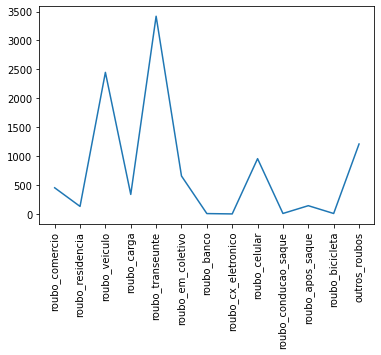

In [73]:
#Definindo a categoria com máxima e média de roubos por cartegoria
max_roubo = df_roubo.max()
med_roubo = df_roubo.mean()

print('Roubos máximos registrados por categoria: ', max_roubo)
print('Média de roubos registrados por categoria: ', med_roubo)

import matplotlib.pyplot as plt
plt.plot(med_roubo);
plt.xticks(rotation=90);

Como pode ser observado acima, dentro da modalidade de crime roubo, uma dos que mais acontecem é o **Roubo a transeuntes**.
**Roubo de Bicicleta** foi um dos que apresentaram menor número de registros.


Agora fazendo uma análise similar para os casos de Furto:

In [0]:
#criando um Data Freme apenas com os crímes da categoria Furto
df_furto = df[['furto_veiculos', 'furto_transeunte', 'furto_coletivo', 'furto_celular', 'furto_bicicleta', 'outros_furtos']]



Furtos máximos registrados por categoria:  furto_veiculos      2630.0
furto_transeunte    5368.0
furto_coletivo      1036.0
furto_celular       2215.0
furto_bicicleta      243.0
outros_furtos       9880.0
dtype: float64
Média de Furtos registrados por categoria:  furto_veiculos      1674.671512
furto_transeunte    1518.921512
furto_coletivo       650.230000
furto_celular       1449.175000
furto_bicicleta      124.808824
outros_furtos       5994.328488
dtype: float64


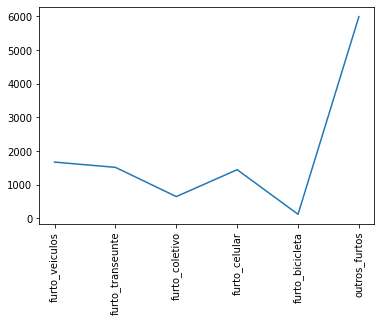

In [77]:
#Definindo a categoria com máxima e média de roubos por cartegoria
max_furto = df_furto.max()
med_furto = df_furto.mean()

#descrevendo os máximo e as médias de cada categoria de furto
print('Furtos máximos registrados por categoria: ', max_furto)
print('Média de Furtos registrados por categoria: ', med_furto)

#plotando gráfico da média de furtos
plt.plot(med_furto);
plt.xticks(rotation=90);

Como pode ser observado acima, o maior número de furtos está concentrado na catergoria **`outros_furtos`**, com uma quantidade expressivamente maior de casos, o que pode nos levar a inferir que abordar outra classificação para a modalidade de furto poderia ser empregada, para poder ter uma noção mais clara sobre as características desse tipo de crime no Rio de Janeiro.

## Conclusão

A disponibilização de dados sobre segurança pública pode ajudar dá uma visão maior sobre a atual situação da localidade e as características dos crimes que ocorrem na região, assim como a possibilidade de se avaliar fatores que influenciam no cotidiano de quem vive no local.

A presente análise, apesar de breve e de permitir outras constatações caso seja feita um trabalho mais profundo, nos trouxe *insights* interessantes que nos auxilia a averiguar a causa de certas características locais, como por exemplo, com um índice de recuperação de veículos por volta de **43%**, pode-se impactar diretamente o preço de seguro e de locação de veículos na cidade.

Outra situação que deve ser melhor analisada pelas autoridades públicas locais é a utilização da categoria de furto, `outros_furtos`, representar o maior número de crimes dessa categoria, seria interessante desmembrá-la para outras categorias de furto para que se possa ter uma visão melhor desse tipo de crime na cidade
